In [426]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objects as go




In [427]:
df_merged = pd.read_csv('D:\\Projo\\Projet-Data-IA\\Merged_all_tables\\merged_final.csv', sep=',')

In [428]:

# def minutes_to_hours_minutes(minutes):
#     hours = int(minutes / 60)
#     remaining_minutes = minutes % 60
#     return f"{hours} heures {remaining_minutes} minutes"

# df_merged['runtimeMinutes'] = df_merged['runtimeMinutes'].apply(minutes_to_hours_minutes)
# # rename de la colonne runtimeMinutes à duration
# df_merged.rename(columns={'runtimeMinutes': 'duration'}, inplace=True)

In [429]:
# Jointures des tables title et merged_all_tables pour récupérer les valeurs de la colonne genres

# df_del_cols = pd.read_csv('D:\\Projo\\Projet-Data-IA\\title_del_cols.csv', sep=',')
# df_merged = pd.merge(df_merged, df_del_cols, left_on='titleId', right_on='tconst', how='left')

In [430]:
# def clean_actors_list(actors_list):
#     # Convertir la liste en un ensemble pour supprimer les doublons, puis trier
#     unique_actors = sorted(set(actors_list))
#     # Convertir l'ensemble trié en une chaîne de caractères séparée par des virgules
#     cleaned_list = ', '.join(unique_actors)
#     return cleaned_list

# # Appliquer la fonction à chaque élément de la colonne "Actors_Actresses"
# df_merged['Actors_Actresses'] = df_merged['Actors_Actresses'].apply(eval).apply(clean_actors_list)
# df_merged['production_companies_name'] = df_merged['production_companies_name'].apply(eval).apply(clean_actors_list)

# Suppression des colonnes inutiles pour l'analyse
df_merged.drop(columns=['overview', 'poster_path', 'backdrop_path', 'popularity', 'nconst_director'], inplace=True)
df_merged.dropna(inplace=True)

df_merged.head(50)

,titleId,title,averageRating,numVotes,startYear,runtimeMinutes,genres,production_companies_name,Director_name,Actors_Actresses
0,tt0035423,Kate et Léopold,6.4,88939.0,2001.0,118.0,Comedy,"Konrad Pictures, Miramax",James Mangold,"Bradley Whitford, Breckin Meyer, Hugh Jackman,..."
1,tt0035423,Kate et Léopold,6.4,88939.0,2001.0,118.0,Fantasy,"Konrad Pictures, Miramax",James Mangold,"Bradley Whitford, Breckin Meyer, Hugh Jackman,..."
2,tt0035423,Kate et Léopold,6.4,88939.0,2001.0,118.0,Romance,"Konrad Pictures, Miramax",James Mangold,"Bradley Whitford, Breckin Meyer, Hugh Jackman,..."
3,tt0036606,Les Coeurs captifs,6.5,354.0,1983.0,118.0,Drama,"Associated-Rediffusion Television, Channel Fou...",Michael Radford,"Claudio Rosini, Denise Coffey, Gianluca Favill..."
4,tt0036606,Les Coeurs captifs,6.5,354.0,1983.0,118.0,War,"Associated-Rediffusion Television, Channel Fou...",Michael Radford,"Claudio Rosini, Denise Coffey, Gianluca Favill..."
5,tt0059325,Génération 45,6.5,265.0,1990.0,100.0,Drama,"DEFA, Künstlerische Arbeitsgruppe ''Roter Kreis''",Jürgen Böttcher,"Anita Okon, Gesine Rosenberg, Holger Mahlich, ..."
6,tt0059325,Génération 45,6.5,265.0,1990.0,100.0,Romance,"DEFA, Künstlerische Arbeitsgruppe ''Roter Kreis''",Jürgen Böttcher,"Anita Okon, Gesine Rosenberg, Holger Mahlich, ..."
7,tt0064222,"Le septième jour, la huitième nuit",6.9,121.0,1990.0,103.0,Drama,Filmové studio Barrandov,Evald Schorm,"Bozena Böhmová, Jan Libícek, Josef Bek, Josef ..."
8,tt0064222,"Le septième jour, la huitième nuit",6.9,121.0,1990.0,103.0,Mystery,Filmové studio Barrandov,Evald Schorm,"Bozena Böhmová, Jan Libícek, Josef Bek, Josef ..."
9,tt0067625,La vérification,7.9,2576.0,1986.0,96.0,Drama,Lenfilm,Aleksey German,"Anatoliy Solonitsyn, Anda Zaice, Fyodor Odinok..."


In [431]:
df_merged['genres'].value_counts()

genres
Drama          13453
Comedy          6467
Action          3574
Romance         3475
Crime           3471
Thriller        2996
Adventure       2110
Horror          1799
Mystery         1666
Biography       1178
Fantasy         1153
Sci-Fi           855
Family           854
History          842
Animation        512
War              489
Musical          180
Documentary      173
Western          103
Name: count, dtype: int64

In [432]:
df_merged.dtypes


titleId                       object
title                         object
averageRating                float64
numVotes                     float64
startYear                    float64
runtimeMinutes               float64
genres                        object
production_companies_name     object
Director_name                 object
Actors_Actresses              object
dtype: object

In [433]:
df_merged.describe()

,averageRating,numVotes,startYear,runtimeMinutes
count,45350.000000,4.535000e+04,45350.000000,45350.000000
mean,6.381462,4.675167e+04,2006.908534,107.517596
std,0.748270,1.312891e+05,11.925046,17.600784
min,5.000000,1.010000e+02,1981.000000,85.000000
25%,5.800000,1.396000e+03,1998.000000,95.000000
50%,6.400000,6.048500e+03,2009.000000,104.000000
75%,6.900000,3.124625e+04,2017.000000,115.000000
max,9.300000,2.878611e+06,2024.000000,238.000000


In [435]:
# Les 20 films les mieux notés de 1980 à 2024

df_sorted_avg =  df_merged.sort_values(by='averageRating', ascending=False)
df_sorted_avg.head(20)

,titleId,title,averageRating,numVotes,startYear,runtimeMinutes,genres,production_companies_name,Director_name,Actors_Actresses
8811,tt0111161,Les évadés,9.3,2878611.0,1994.0,142.0,Drama,Castle Rock Entertainment,Frank Darabont,"Bob Gunton, Clancy Brown, Gil Bellows, James W..."
34953,tt21093976,National Theatre Live: Prima Facie,9.1,1734.0,2022.0,120.0,Drama,"Echo Lake Entertainment, Empire Street Product...",Justin Martin,Jodie Comer
20955,tt0468569,The Dark Knight : Le Chevalier noir,9.0,2861067.0,2008.0,152.0,Action,"DC Comics, Isobel Griffiths, Legendary Picture...",Christopher Nolan,"Aaron Eckhart, Christian Bale, Cillian Murphy,..."
13133,tt0167260,Le Seigneur des anneaux : Le Retour du roi,9.0,1972573.0,2003.0,201.0,Adventure,"New Line Cinema, The Saul Zaentz Company, Wing...",Peter Jackson,"Ali Astin, David Aston, Elijah Wood, Ian McKel..."
13132,tt0167260,Le Seigneur des anneaux : Le Retour du roi,9.0,1972573.0,2003.0,201.0,Action,"New Line Cinema, The Saul Zaentz Company, Wing...",Peter Jackson,"Ali Astin, David Aston, Elijah Wood, Ian McKel..."
8014,tt0108052,La liste de Schindler,9.0,1445610.0,1993.0,195.0,History,Amblin Entertainment,Steven Spielberg,"Ben Kingsley, Béatrice Macola, Caroline Goodal..."
8013,tt0108052,La liste de Schindler,9.0,1445610.0,1993.0,195.0,Drama,Amblin Entertainment,Steven Spielberg,"Ben Kingsley, Béatrice Macola, Caroline Goodal..."
13134,tt0167260,Le Seigneur des anneaux : Le Retour du roi,9.0,1972573.0,2003.0,201.0,Drama,"New Line Cinema, The Saul Zaentz Company, Wing...",Peter Jackson,"Ali Astin, David Aston, Elijah Wood, Ian McKel..."
20957,tt0468569,The Dark Knight : Le Chevalier noir,9.0,2861067.0,2008.0,152.0,Drama,"DC Comics, Isobel Griffiths, Legendary Picture...",Christopher Nolan,"Aaron Eckhart, Christian Bale, Cillian Murphy,..."
20956,tt0468569,The Dark Knight : Le Chevalier noir,9.0,2861067.0,2008.0,152.0,Crime,"DC Comics, Isobel Griffiths, Legendary Picture...",Christopher Nolan,"Aaron Eckhart, Christian Bale, Cillian Murphy,..."


In [436]:
# Moyenne durée des 20 films les mieux notés
df_mean_avg = df_sorted_avg['runtimeMinutes'].head(20).mean()
df_mean_avg.round()

168.0

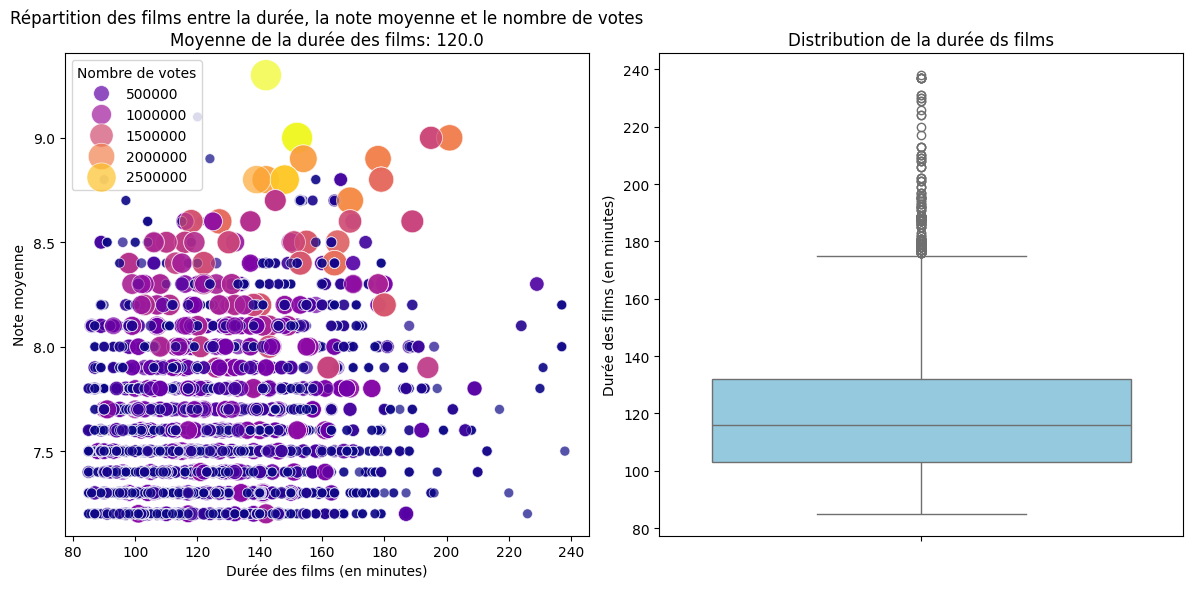

In [450]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Les n premiers films les mieux notés
df_top_20 = df_sorted_avg.sort_values(by='averageRating', ascending=False).head(6995)

# Nuage de points avec 'runtimeMinutes' sur l'axe x, 'averageRating' sur l'axe y et 'numVotes' comme taille des points
sns.scatterplot(data=df_top_20, x='runtimeMinutes', y='averageRating', hue='numVotes', palette='plasma', size='numVotes', sizes=(50, 500), alpha=0.7, ax=axes[0])

# Barre de couleur pour expliquer la signification des couleurs
axes[0].legend(title='Nombre de votes', loc='upper left')

axes[0].set_xlabel('Durée des films (en minutes)')
axes[0].set_ylabel('Note moyenne')
axes[0].set_title(f'Répartition des films entre la durée, la note moyenne et le nombre de votes\nMoyenne de la durée des films: {df_top_20["runtimeMinutes"].mean().round()}')

# Graphique boxplot pour 'runtimeMinutes'
sns.boxplot(data=df_top_20, y='runtimeMinutes', ax=axes[1], color='skyblue')

# Ajouter des labels et un titre
axes[1].set_ylabel('Durée des films (en minutes)')
axes[1].set_title('Distribution de la durée ds films')


plt.tight_layout()
plt.show()



* On peut voir que la majorité des films de 500 000 à 1 000 000 de nombres de votes se situe entre 110 Minutes et 140 Minutes

In [438]:
# Top 20 des films les plus votés
df_sorted_numVotes =  df_merged.sort_values(by='numVotes', ascending=False)
df_sorted_numVotes.head(20)

,titleId,title,averageRating,numVotes,startYear,runtimeMinutes,genres,production_companies_name,Director_name,Actors_Actresses
8811,tt0111161,Les évadés,9.3,2878611.0,1994.0,142.0,Drama,Castle Rock Entertainment,Frank Darabont,"Bob Gunton, Clancy Brown, Gil Bellows, James W..."
20956,tt0468569,The Dark Knight : Le Chevalier noir,9.0,2861067.0,2008.0,152.0,Crime,"DC Comics, Isobel Griffiths, Legendary Picture...",Christopher Nolan,"Aaron Eckhart, Christian Bale, Cillian Murphy,..."
20955,tt0468569,The Dark Knight : Le Chevalier noir,9.0,2861067.0,2008.0,152.0,Action,"DC Comics, Isobel Griffiths, Legendary Picture...",Christopher Nolan,"Aaron Eckhart, Christian Bale, Cillian Murphy,..."
20957,tt0468569,The Dark Knight : Le Chevalier noir,9.0,2861067.0,2008.0,152.0,Drama,"DC Comics, Isobel Griffiths, Legendary Picture...",Christopher Nolan,"Aaron Eckhart, Christian Bale, Cillian Murphy,..."
29005,tt1375666,Inception,8.8,2541819.0,2010.0,148.0,Action,"Legendary Pictures, Syncopy, Warner Bros. Pict...",Christopher Nolan,"Cillian Murphy, Dileep Rao, Elliot Page, Josep..."
29006,tt1375666,Inception,8.8,2541819.0,2010.0,148.0,Adventure,"Legendary Pictures, Syncopy, Warner Bros. Pict...",Christopher Nolan,"Cillian Murphy, Dileep Rao, Elliot Page, Josep..."
29007,tt1375666,Inception,8.8,2541819.0,2010.0,148.0,Sci-Fi,"Legendary Pictures, Syncopy, Warner Bros. Pict...",Christopher Nolan,"Cillian Murphy, Dileep Rao, Elliot Page, Josep..."
12298,tt0137523,Fight Club,8.8,2314328.0,1999.0,139.0,Drama,"20th Century Fox, Atman Entertainment, Fox 200...",David Fincher,"Brad Pitt, Christina Cabot, David Andrews, Edw..."
8437,tt0109830,Forrest Gump,8.8,2248303.0,1994.0,142.0,Romance,"Paramount, The Steve Tisch Company, Wendy Fine...",Robert Zemeckis,"Bob Penny, Gary Sinise, George Kelly, Harold G..."
8436,tt0109830,Forrest Gump,8.8,2248303.0,1994.0,142.0,Drama,"Paramount, The Steve Tisch Company, Wendy Fine...",Robert Zemeckis,"Bob Penny, Gary Sinise, George Kelly, Harold G..."


In [439]:
df_merged.value_counts('genres')

genres
Drama          13453
Comedy          6467
Action          3574
Romance         3475
Crime           3471
Thriller        2996
Adventure       2110
Horror          1799
Mystery         1666
Biography       1178
Fantasy         1153
Sci-Fi           855
Family           854
History          842
Animation        512
War              489
Musical          180
Documentary      173
Western          103
Name: count, dtype: int64

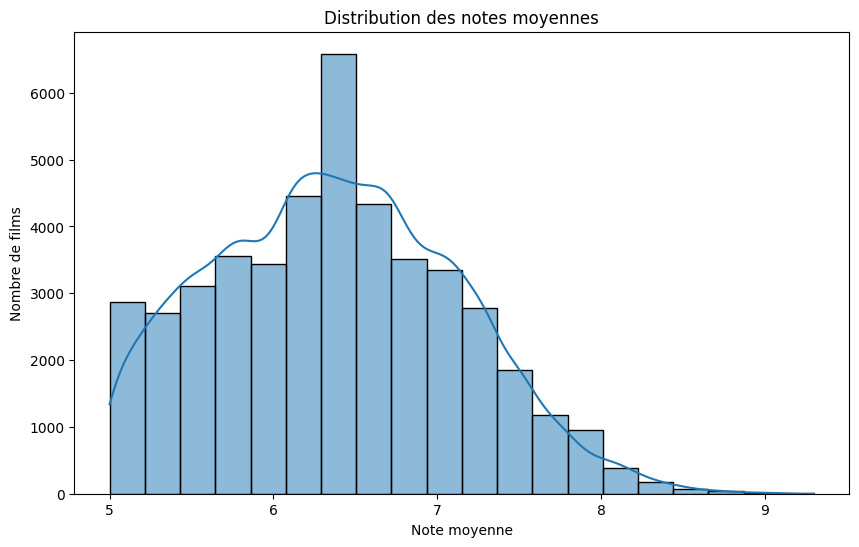

In [440]:
# Moyenne des notes
plt.figure(figsize=(10, 6))
sns.histplot(df_merged['averageRating'], bins=20, kde=True)
plt.title('Distribution des notes moyennes')
plt.xlabel('Note moyenne')
plt.ylabel('Nombre de films')
plt.show()


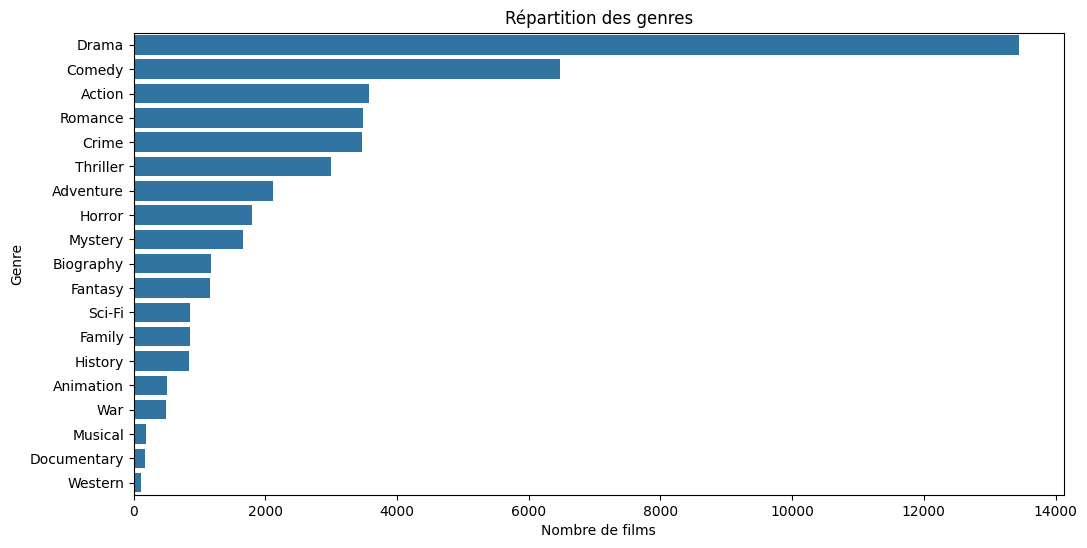

In [441]:
# Diagramme en barres pour les genres
plt.figure(figsize=(12, 6))
sns.countplot(y=df_merged['genres'], order = df_merged['genres'].value_counts().index)
plt.title('Répartition des genres')
plt.xlabel('Nombre de films')
plt.ylabel('Genre')
plt.show()


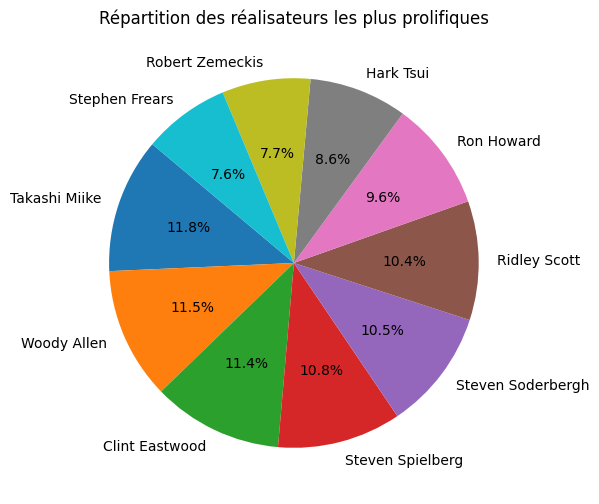

In [442]:
# les réalisateurs les plus sollicités
# Ajouter les années
# faire un graphique des meilleures réalisateurs par films a succés
top_directors = df_merged['Director_name'].value_counts().head(10)
plt.figure(figsize=(10, 6))
plt.pie(top_directors, labels=top_directors.index, autopct='%1.1f%%', startangle=140)
plt.title('Répartition des réalisateurs les plus prolifiques')
plt.show()

In [443]:
# Diagramme en barres pour les acteurs les plus sollicités
df_merged['Actors_Actresses'].value_counts().head()
# TRIER LES ACTEURS PAR NOMBRE DE FILMS LES PLUS SOLICITES ET LES ANNÉES DE LEURS FILMS

Actors_Actresses
Donald Sutherland, Elizabeth Banks, Jennifer Lawrence, Josh Hutcherson, Julianne Moore, Liam Hemsworth, Philip Seymour Hoffman, Sam Claflin, Willow Shields, Woody Harrelson    6
Keith Scott, Robyn Moore                                                                                                                                                        6
Akira Kamiya, Ikue Ôtani, Ken'ichi Ogata, Megumi Hayashibara, Minami Takayama, Naoko Matsui, Wakana Yamazaki, Wataru Takagi, Yukiko Iwai                                        6
Eric Ruf, Eva Green, François Civil, Jacob Fortune-Lloyd, Louis Garrel, Lyna Khoudri, Pio Marmaï, Romain Duris, Vicky Krieps, Vincent Cassel                                    6
Hisato Izaki, Kaname Endô, Kenta Kiritani, Kyôsuke Yabe, Meisa Kuroki, Shun Oguri, Suzunosuke Tanaka, Tsutomu Takahashi, Yusuke Kamiji, Yûsuke Izaki                            6
Name: count, dtype: int64

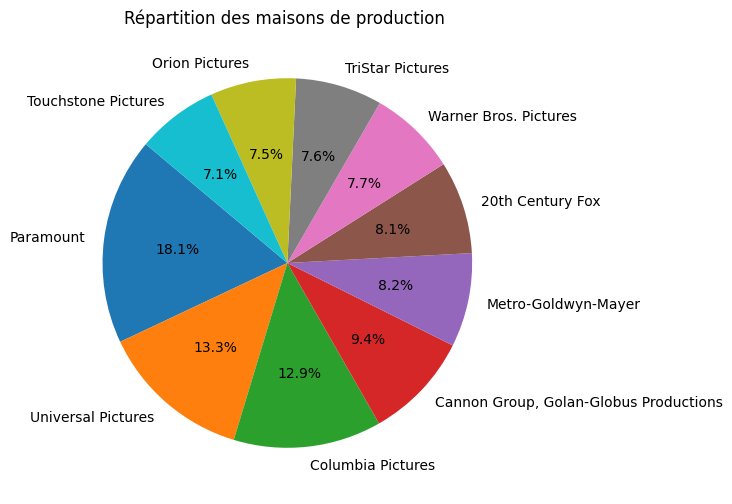

In [444]:
# Compagnies de production les plus populaires
# les réalisateurs les plus sollicités
# Ajouter les années
# faire un graphique des meilleures réalisateurs par films a succés
top_directors = df_merged['production_companies_name'].value_counts().head(10)
plt.figure(figsize=(10, 6))
plt.pie(top_directors, labels=top_directors.index, autopct='%1.1f%%', startangle=140)
plt.title('Répartition des maisons de production ')
plt.show()


In [445]:
# Nombres de films pa année de sortie de  film